In [6]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Define some parameters for the loader:

In [8]:
batch_size = 32
img_height = 180
img_width = 180

In [9]:
data_dir = r'D:\PYTHON\Final_Year\asl_dataset'

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1815 files belonging to 26 classes.
Using 1452 files for training.


In [11]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1815 files belonging to 26 classes.
Using 363 files for validation.


You can find the class names in the `class_names` attribute on these datasets. These correspond to the directory names in alphabetical order.

In [12]:
class_names = train_ds.class_names
print(class_names)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


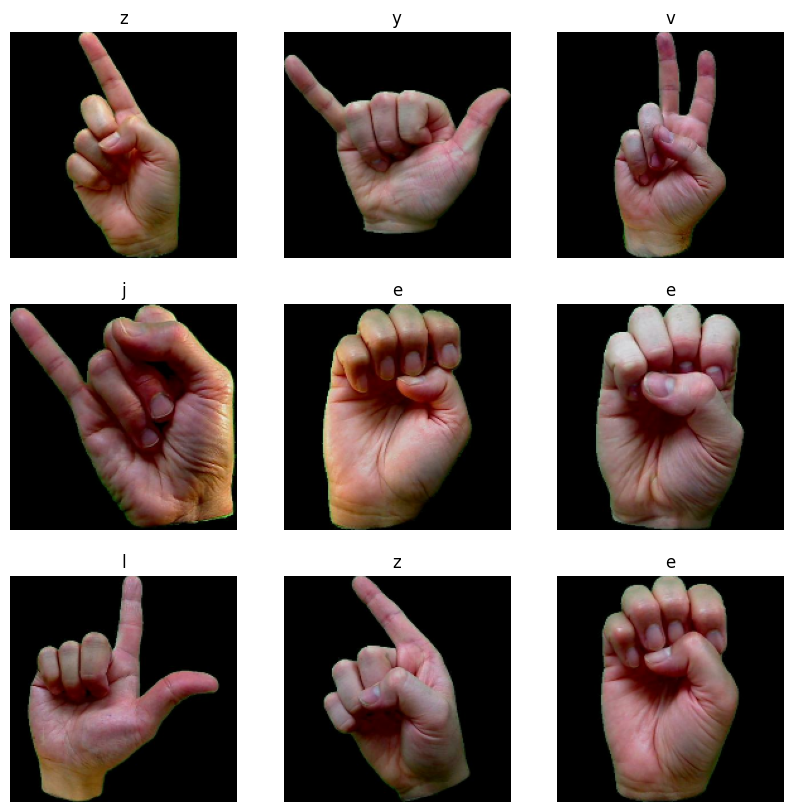

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
normalization_layer = layers.Rescaling(1./255)

In [11]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.982582


In [12]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Model summary

View all the layers of the network using the Keras `Model.summary` method:

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
epochs=
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
46/46 [==============================] - 63s 1s/step - loss: 1.1295 - accuracy: 0.6887 - val_loss: 0.3279 - val_accuracy: 0.9118
Epoch 2/10
46/46 [==============================] - 1s 20ms/step - loss: 0.1427 - accuracy: 0.9539 - val_loss: 0.2391 - val_accuracy: 0.9063
Epoch 3/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0477 - accuracy: 0.9835 - val_loss: 0.1478 - val_accuracy: 0.9587
Epoch 4/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0245 - accuracy: 0.9931 - val_loss: 0.1404 - val_accuracy: 0.9669
Epoch 5/10
46/46 [==============================] - 1s 21ms/step - loss: 0.0061 - accuracy: 0.9979 - val_loss: 0.1120 - val_accuracy: 0.9780
Epoch 6/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 0.1352 - val_accuracy: 0.9669
Epoch 7/10
46/46 [==============================] - 1s 21ms/step - loss: 2.6588e-04 - accuracy: 1.0000 - val_loss: 0.1371 - val_accuracy: 0.9725
Epoch 8/10

In [24]:
from keras.preprocessing import image
img = image.load_img("/content/drive/MyDrive/asl_dataset/a/hand1_a_bot_seg_1_cropped.jpeg",target_size = (180,180,3))
test_image = image.img_to_array(img)
test_image = test_image.reshape(1,180,180,3)
#model.predict()

In [28]:
np.argmax(model.predict(test_image))

1/1 [==============================] - 0s 18ms/step


0

## Visualize training results

Create plots of the loss and accuracy on the training and validation sets:

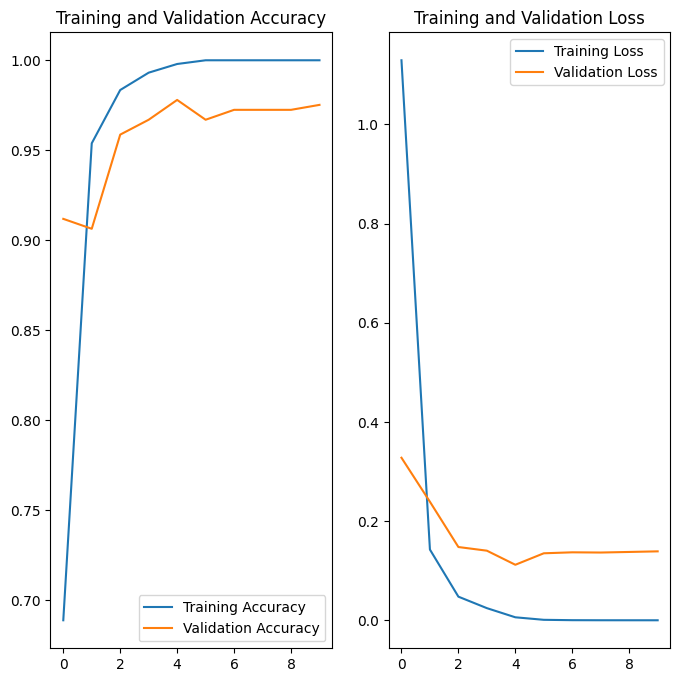

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Overfitting

In the plots above, the training accuracy is increasing linearly over time, whereas validation accuracy stalls around 60% in the training process. Also, the difference in accuracy between training and validation accuracy is noticeable—a sign of [overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

When there are a small number of training examples, the model sometimes learns from noises or unwanted details from training examples—to an extent that it negatively impacts the performance of the model on new examples. This phenomenon is known as overfitting. It means that the model will have a difficult time generalizing on a new dataset.

There are multiple ways to fight overfitting in the training process. In this tutorial, you'll use *data augmentation* and add *dropout* to your model.

## Data augmentation

Overfitting generally occurs when there are a small number of training examples. [Data augmentation](./data_augmentation.ipynb) takes the approach of generating additional training data from your existing examples by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data and generalize better.

You will implement data augmentation using the following Keras preprocessing layers: `tf.keras.layers.RandomFlip`, `tf.keras.layers.RandomRotation`, and `tf.keras.layers.RandomZoom`. These can be included inside your model like other layers, and run on the GPU.

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualize a few augmented examples by applying data augmentation to the same image several times:

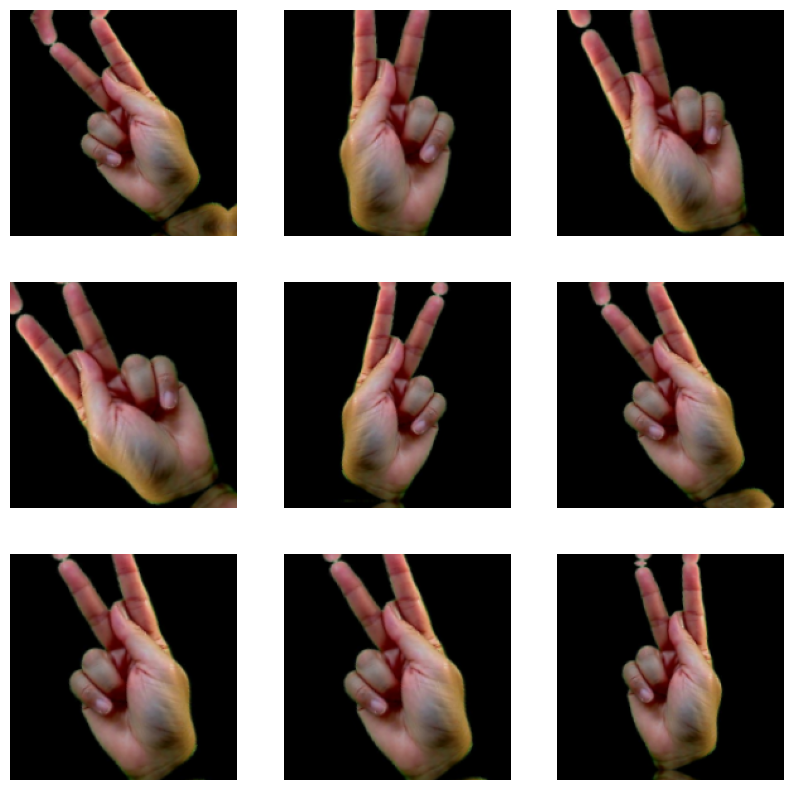

In [31]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

## Dropout

Another technique to reduce overfitting is to introduce [dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization){:.external} regularization to the network.

When you apply dropout to a layer, it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Create a new neural network with `tf.keras.layers.Dropout` before training it using the augmented images:

In [ ]:
model2 = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])

## Compile and train the model

In [39]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [40]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [41]:
epochs = 25
history = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25
46/46 [==============================] - 4s 34ms/step - loss: 2.5337 - accuracy: 0.2383 - val_loss: 1.4593 - val_accuracy: 0.4848
Epoch 2/25
46/46 [==============================] - 2s 42ms/step - loss: 1.2880 - accuracy: 0.5730 - val_loss: 0.8201 - val_accuracy: 0.6915
Epoch 3/25
46/46 [==============================] - 2s 39ms/step - loss: 0.8240 - accuracy: 0.7204 - val_loss: 0.6487 - val_accuracy: 0.7548
Epoch 4/25
46/46 [==============================] - 2s 35ms/step - loss: 0.6393 - accuracy: 0.7824 - val_loss: 0.4013 - val_accuracy: 0.8512
Epoch 5/25
46/46 [==============================] - 2s 34ms/step - loss: 0.4373 - accuracy: 0.8499 - val_loss: 0.4509 - val_accuracy: 0.8154
Epoch 6/25
46/46 [==============================] - 2s 35ms/step - loss: 0.4589 - accuracy: 0.8485 - val_loss: 0.4306 - val_accuracy: 0.8375
Epoch 7/25
46/46 [==============================] - 2s 34ms/step - loss: 0.3926 - accuracy: 0.8609 - val_loss: 0.4063 - val_accuracy: 0.8512
Epoch 8/25
46

## Visualize training results

After applying data augmentation and `tf.keras.layers.Dropout`, there is less overfitting than before, and training and validation accuracy are closer aligned:

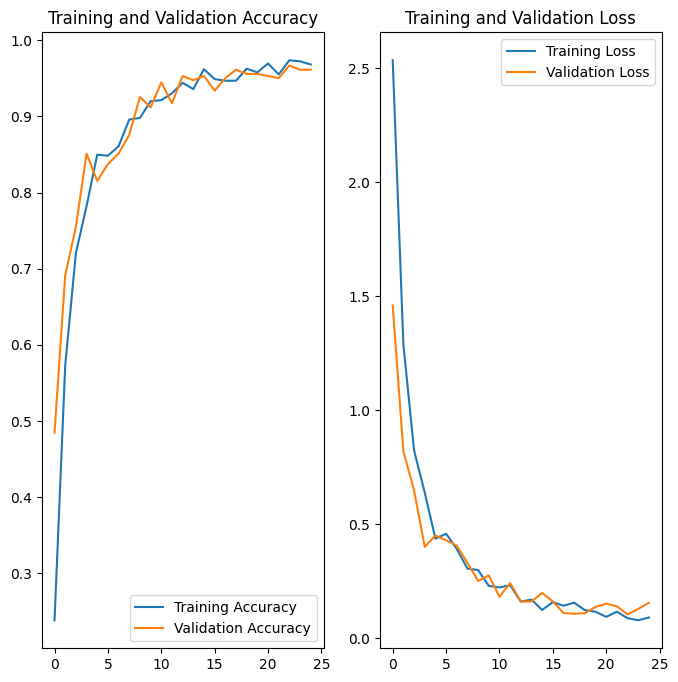

In [42]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Predict on new data

In [21]:
import cv2

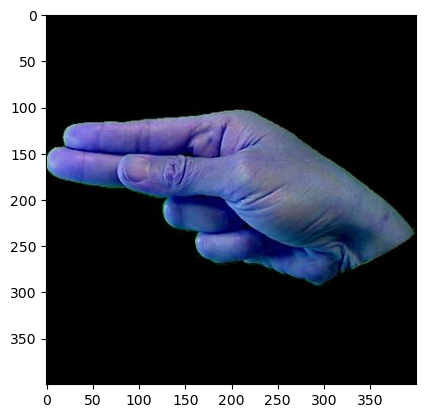

In [22]:
from keras.preprocessing import image
img = image.load_img(r"D:\PYTHON\Final_Year\asl_dataset\h\hand1_h_left_seg_5_cropped.jpeg",target_size = (180,180,3))
data = cv2.imread(r"D:\PYTHON\Final_Year\asl_dataset\h\hand1_h_left_seg_5_cropped.jpeg")
test_image = image.img_to_array(img)
plt.imshow(data)
test_image = test_image.reshape(1,180,180,3)
#model.predict()

In [18]:
#model2.save('/content/drive/MyDrive/model_asl_alpha2/cnn_g8_model.h5')
import tensorflow as  tf

In [19]:
new_model = tf.keras.models.load_model(r"F:\MAINAPP\cnn_g8_model.h5")

In [20]:
class_names[np.argmax(new_model.predict(test_image))]

1/1 [==============================] - 0s 236ms/step


'h'

In [1]:
import tensorflow as tf
tf.__version__

'2.13.0'